In [1]:
import os
base_dir = 'E:/Python/MachineLearning/cat_dog/traindata_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [8]:
from keras import layers
from keras import models
from keras import applications
model = models.Sequential()
conv_base = applications.VGG16(weights='imagenet', 
                               include_top=False, 
                               input_shape=[150, 150, 3]) 
conv_base.trainable = False
model.add(conv_base)
#model.add(layers.Conv2D(32, (3, 3), activation='relu',
#                input_shape=(150, 150, 3)))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

from keras import optimizers
model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=2e-5),
                metrics=['acc'])

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 18,910,017
Trainable params: 4,195,329
Non-trainable params: 14,714,688
_________________________________________________________________


In [4]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size=(150, 150),
                batch_size=20,
                class_mode='binary')

Found 20996 images belonging to 2 classes.


In [6]:
validation_generator = test_datagen.flow_from_directory(
                validation_dir,
                target_size=(150, 150),
                batch_size=20,
                class_mode='binary')

Found 3998 images belonging to 2 classes.


In [14]:
history = model.fit_generator(
                train_generator,
                steps_per_epoch=100,
                epochs=40,
                validation_data=validation_generator,
                validation_steps=50)

Epoch 1/40
100/100 [==============================] - 26s 261ms/step - loss: 0.2997 - acc: 0.8710 - val_loss: 0.2357 - val_acc: 0.8960
Epoch 2/40
100/100 [==============================] - 22s 215ms/step - loss: 0.3209 - acc: 0.8510 - val_loss: 0.2291 - val_acc: 0.9050
Epoch 3/40
100/100 [==============================] - 24s 235ms/step - loss: 0.3338 - acc: 0.8517 - val_loss: 0.2239 - val_acc: 0.9040
Epoch 4/40
100/100 [==============================] - 22s 215ms/step - loss: 0.3044 - acc: 0.8730 - val_loss: 0.2423 - val_acc: 0.8988
Epoch 5/40
100/100 [==============================] - 22s 216ms/step - loss: 0.3164 - acc: 0.8600 - val_loss: 0.2483 - val_acc: 0.8960
Epoch 6/40
100/100 [==============================] - 24s 237ms/step - loss: 0.3002 - acc: 0.8675 - val_loss: 0.2249 - val_acc: 0.9010
Epoch 7/40
100/100 [==============================] - 22s 220ms/step - loss: 0.3032 - acc: 0.8710 - val_loss: 0.2472 - val_acc: 0.8990
Epoch 8/40
100/100 [==============================] - 2

In [15]:
model.save('cats_and_dogs_small.md')

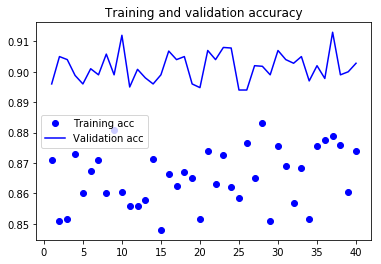

In [16]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

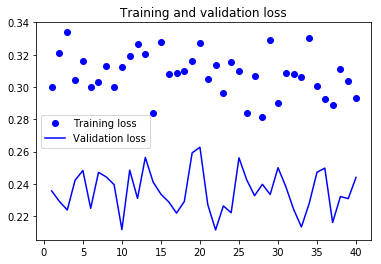

In [17]:

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()